# 复习
- 投影矩阵$P=A(A^TA)^{-1}A^T$,可以将向量b投影到矩阵A的列空间中最近的点，其中两个极端
>- 如果$b\ in\ column\ space\ Pb=b$
>- 如果$b\bot column\ space\ Pb=0$

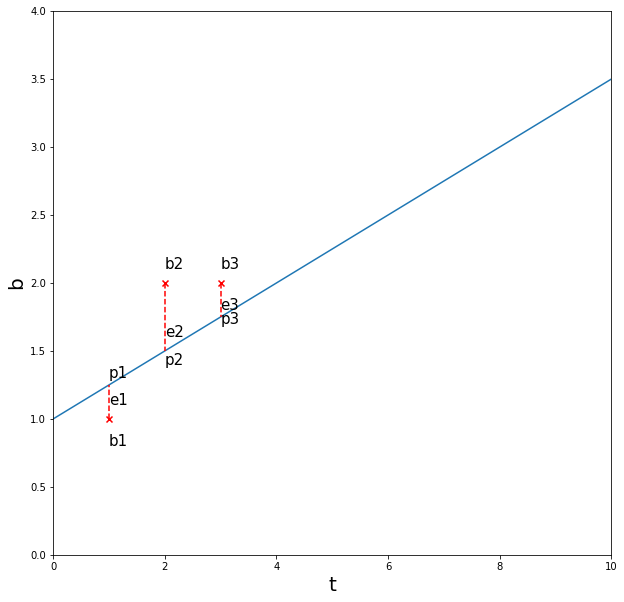

In [9]:
import numpy as np
import matplotlib.pyplot as plt

arr_x = np.array([1,2,3])
arr_y = np.array([1,2,2])

lin_x = np.array([0,10])
lin_y = 0.25*lin_x+1

err1_x = np.array([1,1])
err1_y = np.array([1,1.25])

err2_x = np.array([2,2])
err2_y = np.array([2,1.5])

err3_x = np.array([3,3])
err3_y = np.array([2,1.75])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(arr_x, arr_y, marker="x", c="r")
ax.plot(lin_x, lin_y)
ax.plot(err1_x, err1_y, linestyle="--", c="r")
ax.text(1,1.1, "e1", fontsize=15)
ax.text(1,0.8,"b1",fontsize=15)
ax.text(1,1.3,"p1",fontsize=15)

ax.plot(err2_x, err2_y, linestyle="--", c="r")
ax.text(2,1.6, "e2", fontsize=15)
ax.text(2,2.1,"b2",fontsize=15)
ax.text(2,1.4,"p2",fontsize=15)

ax.plot(err3_x, err3_y, linestyle="--", c="r")
ax.text(3,1.8, "e3", fontsize=15)
ax.text(3,2.1,"b3",fontsize=15)
ax.text(3,1.7,"p3",fontsize=15)

ax.set_xlim(0,10)
ax.set_ylim(0,4)
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("b", fontsize=20)
plt.show()

# 最小二乘法
- 最优解是什么？即最接近的解是什么？从线性方程来解的话就是最小化误差，即要找到拥有最小平方和的解【即最小二乘】，这些误差是Ax和b之间的误差，也就是我想要最小化的，即要最小化$||Ax-b||^2=||e||^2=e_1^2+e_2^2+e_3^2=(C+D-1)^2+(C+2D-2)^2+(C+3D-2)^2$（**从微积分的角度求解**）
- 最下二乘法容易受到离群点的影响，因为这个平方导致的
- 从线性代数的角度考虑问题：$p1,p2,p3$都是在直线上，显然将$p1,p2,p3$这三个向量替换掉原来的b则方程可以求得最优解，考虑矩阵A，那么p就相当于向量b在矩阵A上的投影
- 解出$最优估计\hat{x} = \left[\begin{matrix} C\\D \end{matrix}\right];p$
- 关于$\hat{x}的方程是A^TA\hat{x} = A^Tb;A^TA = \left[\begin{matrix} 1&1&1\\1&2&3 \end{matrix}\right] \left[\begin{matrix} 1&1\\1&2\\1&3 \end{matrix}\right] = \left[\begin{matrix} 3&6\\6&14 \end{matrix}\right]$,这个结果是一个对称矩阵，他是可逆的，而且是正定的（未学习）
- 将等式右边也加入矩阵运算$\left[\begin{matrix} 1&1&1\\1&2&3 \end{matrix}\right] \left[\begin{array}{lr|r} 1&1&1\\1&2&2\\1&3&2  \end{array}\right] = \left[\begin{array}{lr|r} 3&6&5\\6&14&11 \end{array}\right] \rightarrow 正规方程组\begin{cases} 3C+6D=5\\6C+14D=11 \end{cases}\rightarrow \begin{cases}C=\frac{2}{3}\\D=\frac{1}{2} \end{cases};因此最优直线为\frac{2}{3}+\frac{1}{2}t=y$(**从线性代数的角度求解**)

# b/p/e的关系
- $b = p+e;即b=\left[\begin{matrix}1\\2\\2 \end{matrix}\right]=\overbrace{\left[\begin{matrix}\frac{7}{6}\\\frac{5}{3}\\\frac{13}{6} \end{matrix}\right]}^{p}+\overbrace{\left[\begin{matrix}-\frac{1}{6}\\\frac{1}{3}\\-\frac{1}{6} \end{matrix}\right]}^{e}$
- 可以发现向量$p\bot e$,注意，这是在矩阵A的三维空间中，而不是在上图所看到的二维空间中，因此$e\bot A$

- 如果$A$的列线性无关，那么$A^TA$既是可逆矩阵，如何证明这个矩阵是可逆的，可以转而证明$A^TAx=0中，x只有零解（如果矩阵可逆，那么他的零空间仅为零向量）$，相当于证明$x$一定是零向量
- 证明:两边都乘上$x^T;x^TA^TAx=0 \rightarrow (Ax)^T(Ax)=0$(此处相当于向量的长度的平方为0，那么向量必定是零向量)$\rightarrow Ax=0$(由于A的各列是线性无关的，那么可以得出$x=0)\rightarrow x=0$;因此可得$A^TA$是可逆矩阵

- 把零向量排除在外，相互垂直的列，一定是线性无关的，引入标准（长度为1）正交向量组，这个矩阵的各列是标准正交的，下一堂课看标准正交向量